In [1]:
!pip install holidays


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import glob
from holidays import country_holidays

In [3]:
data = sorted(glob.glob("Data/Chicago-Crime_*.csv"))
data
                        

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [4]:
df = pd.concat([pd.read_csv(f) for f in data])

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [6]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [7]:
# df.to_csv('exported_data.csv', index=0)

In [8]:
topic_cols =  ['Date', 'Primary Type', 'Arrest', 'District' ]
topics = df[topic_cols]
topics = topics.set_index('Date')
topics.head()

,Primary Type,Arrest,District
Date,,,
2001-01-01 01:00:00,BATTERY,False,16.0
2001-01-01 13:00:00,BATTERY,False,8.0
2001-01-01 13:00:00,GAMBLING,True,3.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,False,24.0
2001-01-01 01:00:00,BATTERY,False,2.0


## `Topic 1`

In [10]:
topic_1 = topics.loc['2022']

<Axes: >

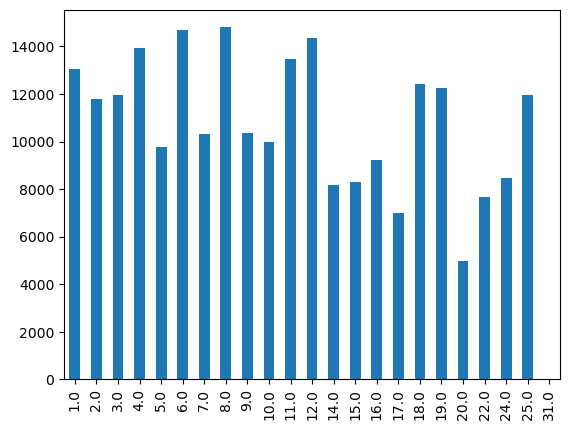

In [15]:
districts = topic_1['District'].value_counts().sort_index()
districts.plot(kind='bar')

- District 8 had the most crime.
- District 20 had the least crime.

## `Topic 2`

In [18]:
years_crimes = topics.resample('YS').size()

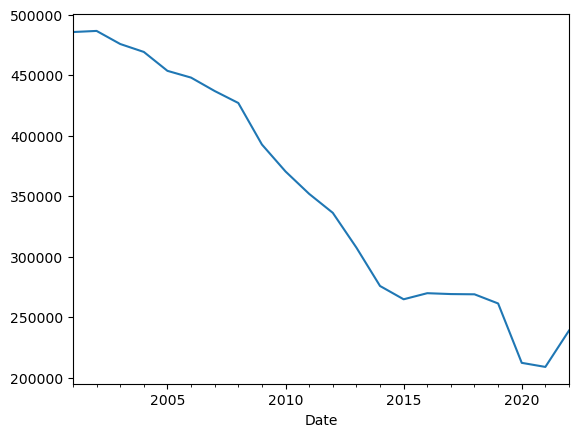

In [21]:
years_crimes.plot();

In [22]:
crimes_per_year = topics.groupby('Primary Type').resample('YS').count()[['Primary Type']]

In [24]:
crimes_per_year = crimes_per_year.unstack().T

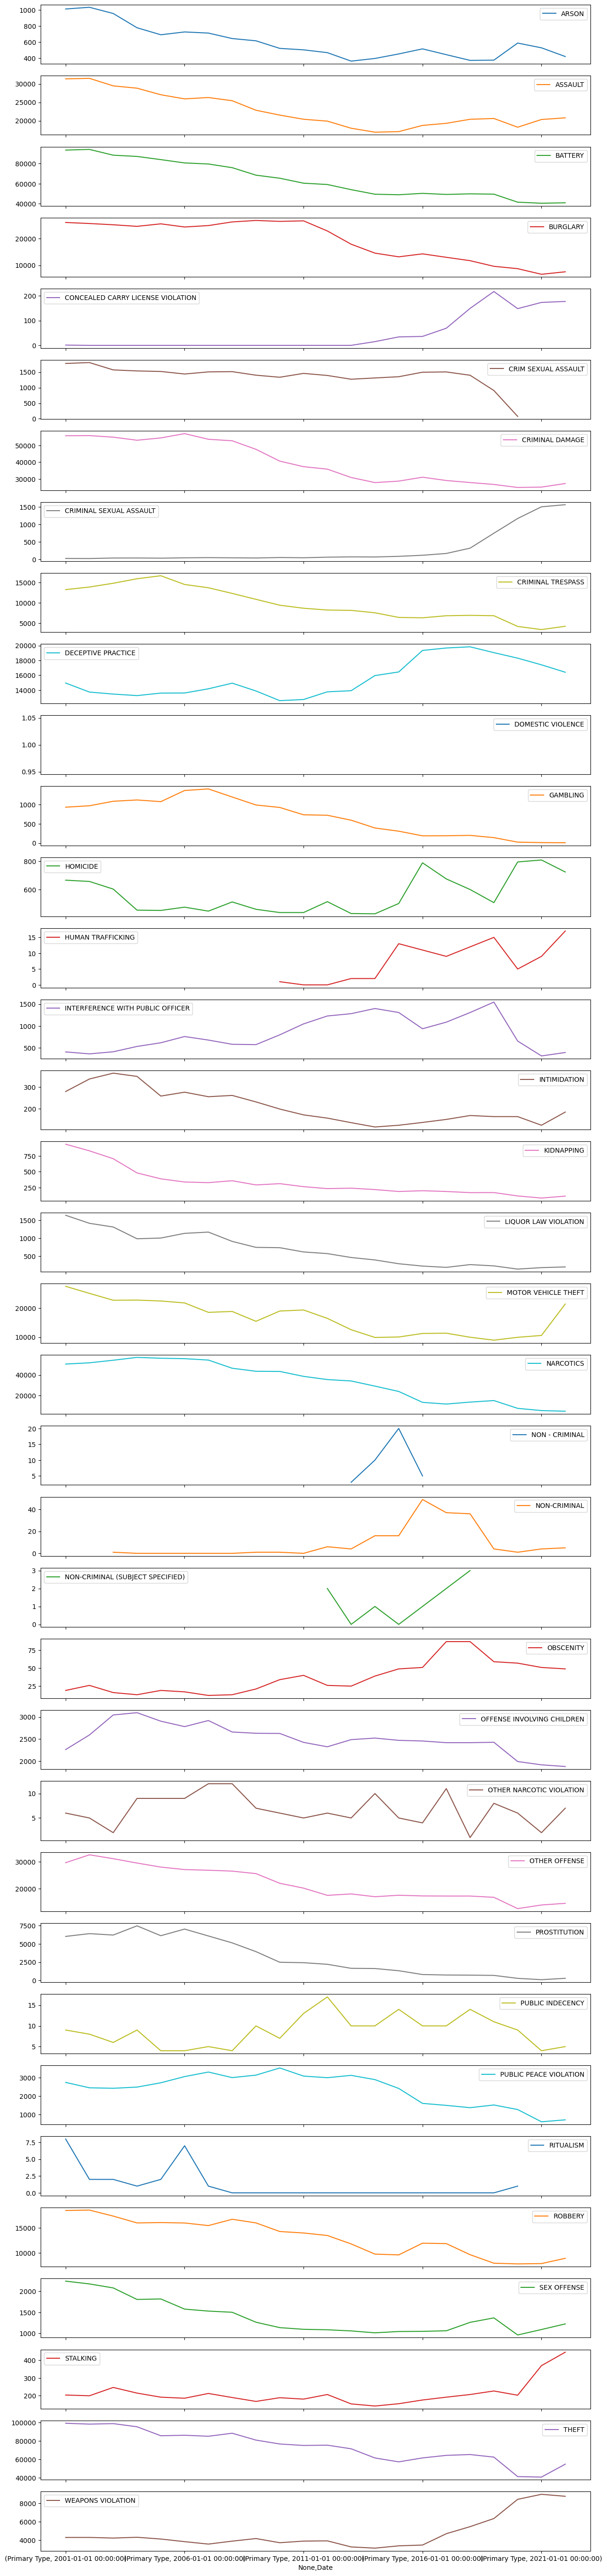

In [37]:
crimes_per_year.plot(subplots=True, figsize=(15,70));

- Concealed Carry License Violation
- Criminal Sexual Assault
- Human Trafficking
- Intimidation
- Motor Vehicle Theft
- Non-Criminal
- Other Narcotic Violation
- Stalking
- Weapons Violation

  Seem to be the crimes rising rather than lowering.


## `Topic 4`

In [33]:
months_cmpr = topics.copy()

In [34]:
months_cmpr['month'] = months_cmpr.index.month

<Axes: xlabel='month'>

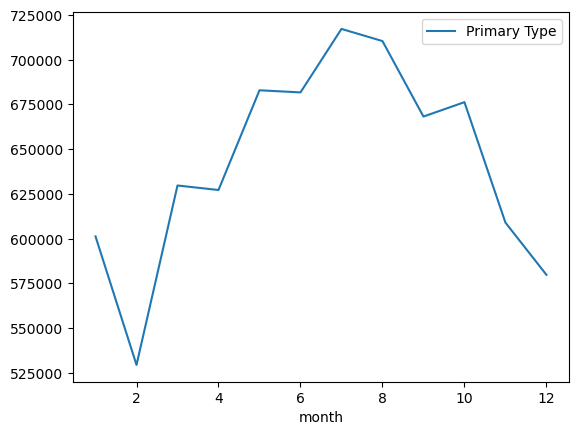

In [36]:
months_cmpr.groupby('month').count()[['Primary Type']].plot()

In [91]:
crimes_by_month = months_cmpr.groupby('Primary Type')['month'].value_counts().sort_index()

In [92]:
plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()

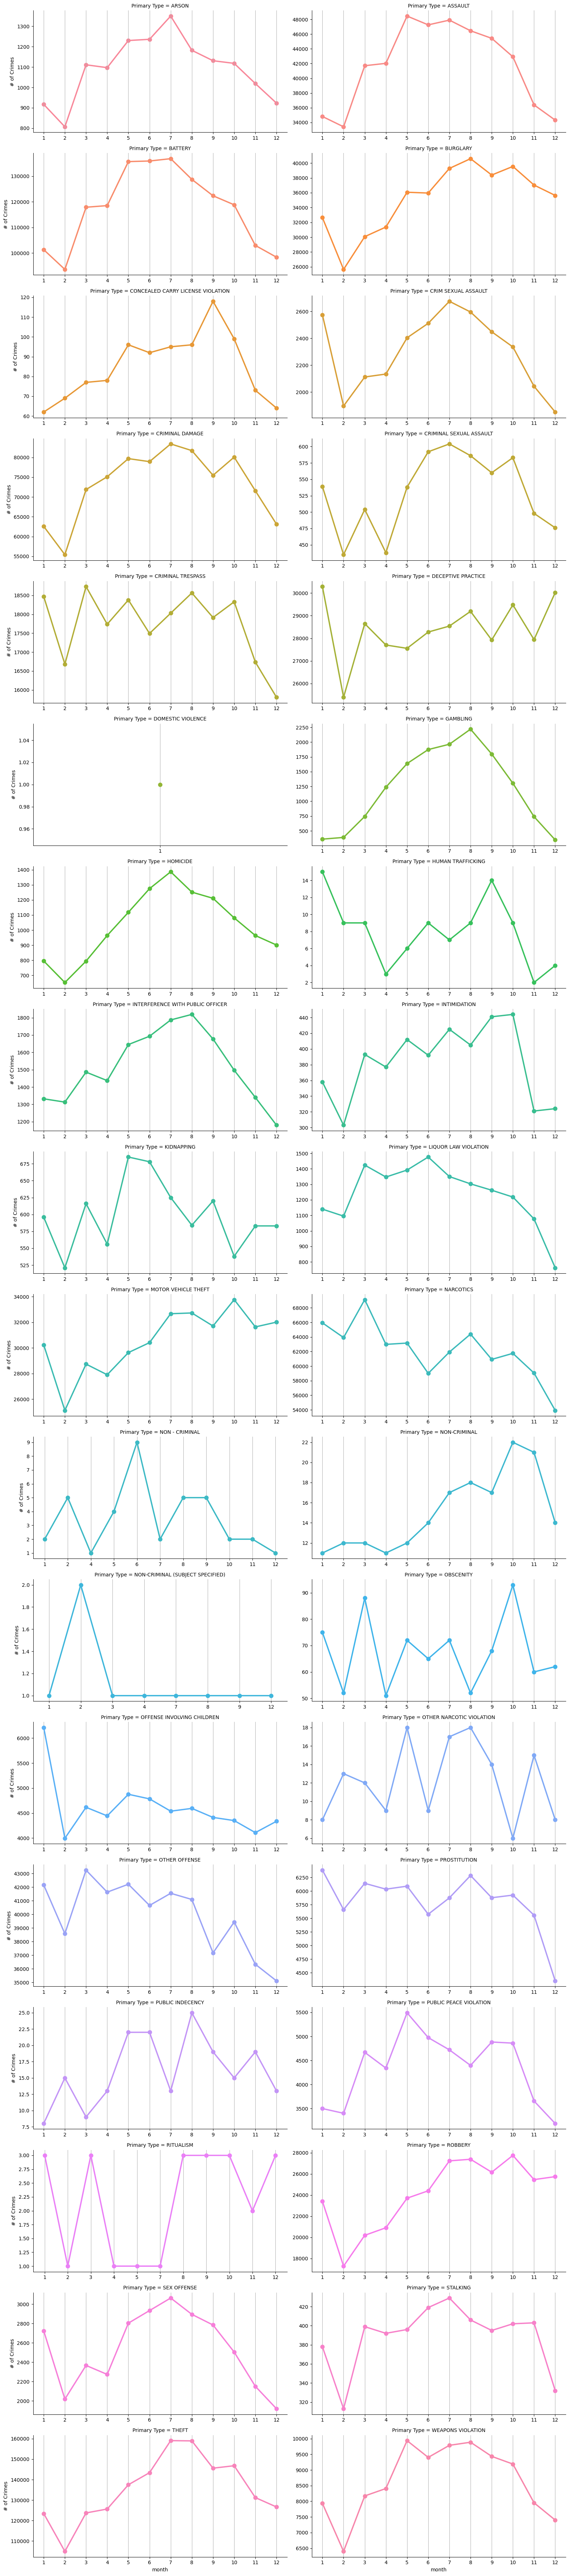

In [94]:
g = sns.catplot(data=plot_df, x='month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

- July and August have the most crimes
- February has the least crimes.

These plots above show that not all crimes follow the same seasonal trend.

